# DBSCAN Algorithm

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in machine learning and data mining. It groups together points that are closely packed together, marking points in low-density areas as outliers.

## Key Concepts

1. **Epsilon (ε):** Defines the radius of the neighborhood around a point. Points within this radius are considered neighbors.

2. **Minimum Points (MinPts):** The minimum number of points required to form a dense region.

3. **Core Point:** A point with at least `MinPts` neighbors within the `ε` radius.

4. **Border Point:** A point that is not a core point but is within the `ε` radius of a core point.

5. **Noise Point:** A point that is neither a core nor a border point.

## Algorithm Steps

1. **Select an unvisited point:** Start with an arbitrary point and find its neighbors within the `ε` radius.

2. **Check Core Point Criteria:** If the point has at least `MinPts` neighbors, mark it as a core point and start forming a cluster.

3. **Expand Cluster:** Recursively add all directly and indirectly reachable points from the core point to the cluster.

4. **Repeat:** Continue the process with the next unvisited point until all points are visited.

5. **Mark Noise:** Points that are not part of any cluster are labeled as noise.

## Advantages

- Can find clusters of arbitrary shape.
- Does not require specifying the number of clusters in advance.
- Robust to outliers.

## Disadvantages

- Requires careful selection of parameters (`ε` and `MinPts`).
- Performance can degrade with high-dimensional data.

DBSCAN is particularly useful for datasets with clusters of varying shapes and densities, and it effectively identifies outliers.


![Sample GIF](sample.gif)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from custom_dbscan import CustomDBScan

In [2]:
df = pd.read_csv("Mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.iloc[:, [3,4]].values

In [5]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

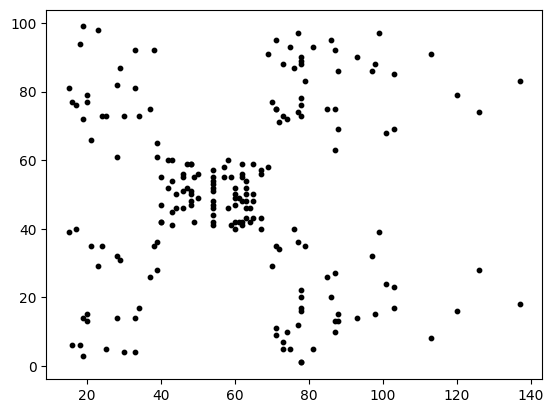

In [6]:
plt.scatter(df[:,0], df[:,1], s=10, c= "black")

In [7]:
import numpy as np

labels=CustomDBScan(df,eps=5,min_samples=5)
print("Cluster labels:", labels)
print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print(np.unique(labels))


Cluster labels: [-1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2 -1 -1  3 -1  5  4  3  4  3 -1  3  4  5  4  3  4  3  4  5 -1  5
  4  5 -1  3 -1  5 -1  5 -1  3 -1  5  4  3  4  3 -1  5 -1  5 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Number of clusters: 5
[-1  1  2  3  4  5]


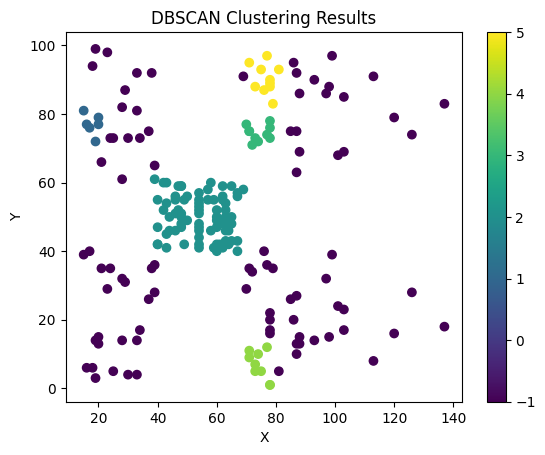

In [8]:
scatter = plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<h1>Using SKLEARN Library</h1>

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [11]:
labels = dbscan.fit_predict(df)

In [12]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

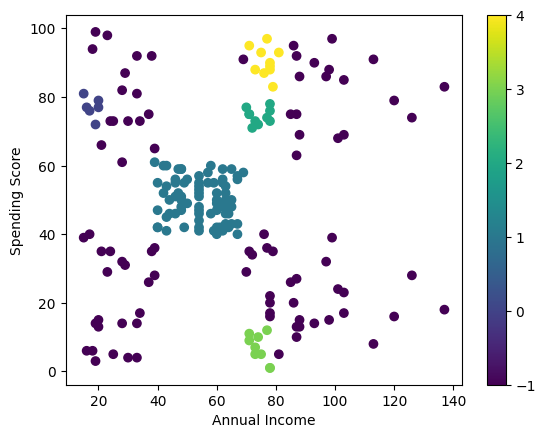

In [13]:
# Visualising the clusters
scatter = plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()